<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-22 13:20:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  44.0MB/s    in 5.0s    

2025-11-22 13:20:18 (40.7 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [9]:
!pip install matplotlib
!pip install seaborn

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [11]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [12]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [13]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [14]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


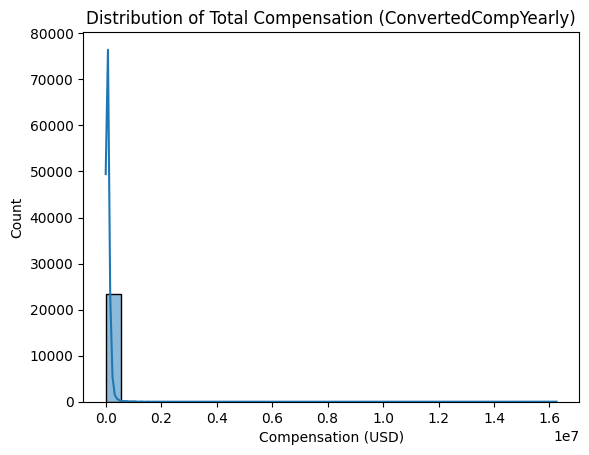

In [24]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)


# Use ConvertedCompYearly for compensation
# Remove commas, convert to numeric, coerce errors
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].astype(str).str.replace(',', '', regex=False)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly'])


sns.histplot(df_clean['ConvertedCompYearly'], bins=30, kde=True)
plt.title("Distribution of Total Compensation (ConvertedCompYearly)")
plt.xlabel("Compensation (USD)")
plt.ylabel("Count")
plt.show()




**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


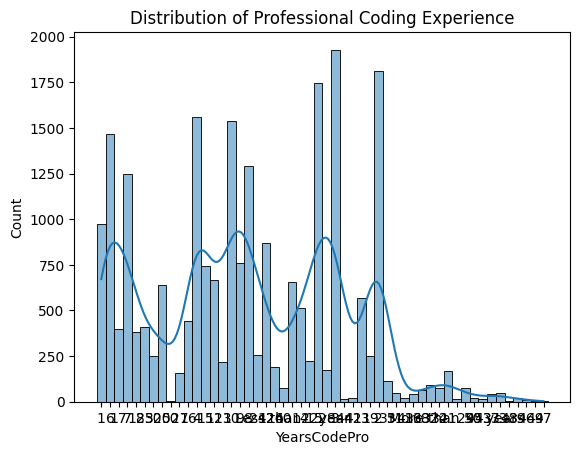

In [25]:

# 1.2 Histogram of YearsCodePro
sns.histplot(df_clean['YearsCodePro'], bins=20, kde=True)
plt.title("Distribution of Professional Coding Experience")
plt.xlabel("YearsCodePro")
plt.ylabel("Count")
plt.show()




### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


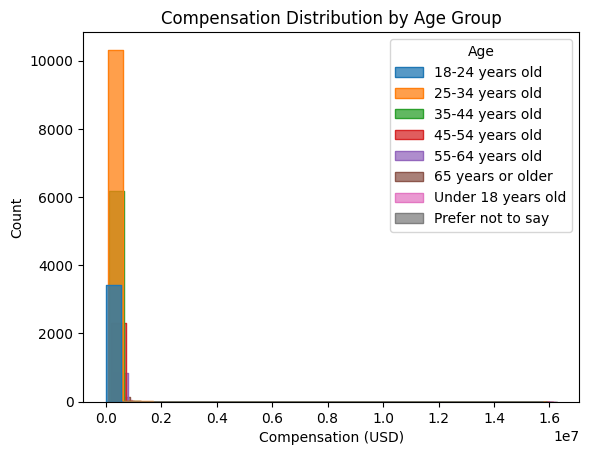

In [26]:
# 2.1 Histogram Comparison of Compensation by Age Group
sns.histplot(data=df_clean, x='ConvertedCompYearly', hue='Age', bins=30, element='step', stat='count', multiple='dodge')
plt.title("Compensation Distribution by Age Group")
plt.xlabel("Compensation (USD)")
plt.ylabel("Count")
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


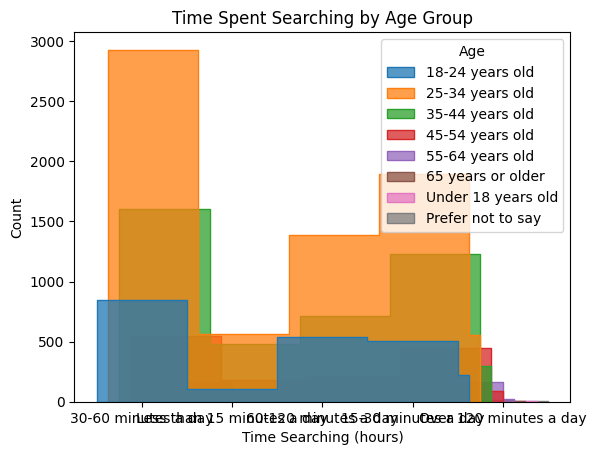

In [27]:

# 2.2 Histogram of TimeSearching by Age Group
sns.histplot(data=df_clean, x='TimeSearching', hue='Age', bins=20, element='step', stat='count', multiple='dodge')
plt.title("Time Spent Searching by Age Group")
plt.xlabel("Time Searching (hours)")
plt.ylabel("Count")
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


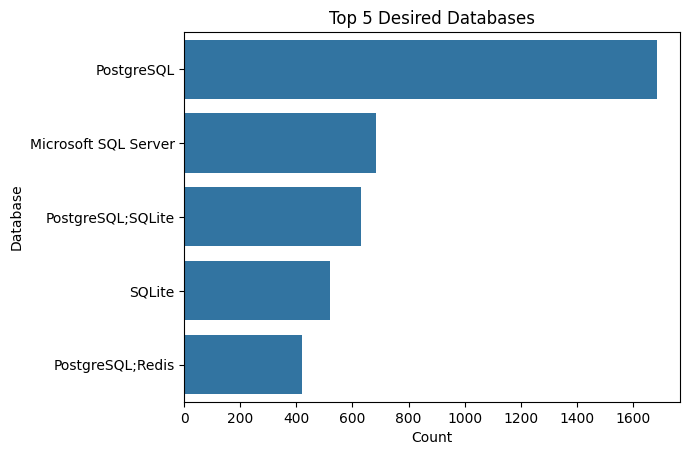

In [28]:
# 3.1 Histogram of Most Desired Databases (Top 5)
top_dbs = df_clean['DatabaseWantToWorkWith'].value_counts().nlargest(5)
sns.barplot(x=top_dbs.values, y=top_dbs.index)
plt.title("Top 5 Desired Databases")
plt.xlabel("Count")
plt.ylabel("Database")
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


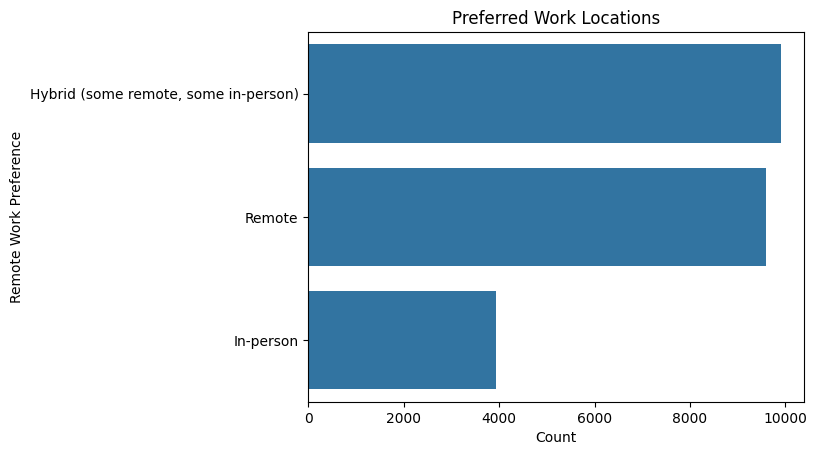

In [29]:

# 3.2 Histogram of Preferred Work Locations
remote_counts = df_clean['RemoteWork'].value_counts()
sns.barplot(x=remote_counts.values, y=remote_counts.index)
plt.title("Preferred Work Locations")
plt.xlabel("Count")
plt.ylabel("Remote Work Preference")
plt.show()



### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


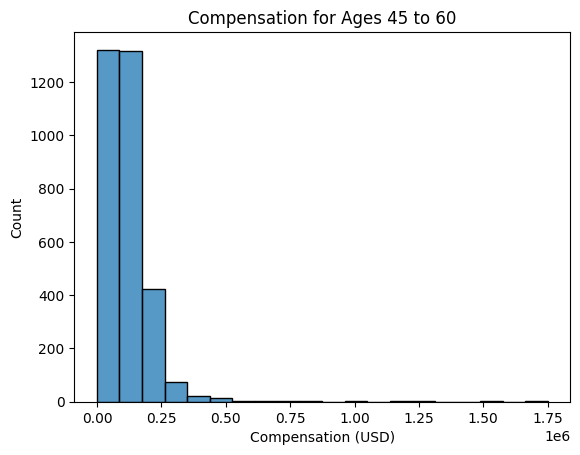

In [30]:
# 4.1 Histogram of Compensation for Ages 45 to 60
mid_age = df_clean[df_clean['Age'].isin(['45-54 years old', '55-64 years old'])]
sns.histplot(mid_age['ConvertedCompYearly'], bins=20)
plt.title("Compensation for Ages 45 to 60")
plt.xlabel("Compensation (USD)")
plt.ylabel("Count")
plt.show()



**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [32]:
# 4.2 Histogram of Job Satisfaction by YearsCodePro
# Bin YearsCodePro for visualization
bins = [0, 2, 5, 10, 20, 50]
labels = ['0-2','3-5','6-10','11-20','21-50']
df_clean['YearsCodePro_bin'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

# Now plot JobSat by YearsCodePro_bin
sns.histplot(
    data=df_clean, 
    x='JobSat', 
    hue='YearsCodePro_bin', 
    bins=20, 
    element='step', 
    stat='count', 
    multiple='dodge'
)
plt.title("Job Satisfaction by Years of Professional Coding Experience")
plt.xlabel("Job Satisfaction (JobSat)")
plt.ylabel("Count")
plt.show()


TypeError: '<' not supported between instances of 'int' and 'str'

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [33]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
